<a href="https://colab.research.google.com/github/Leonard-Boante-Mensah/Netflix_Visualization_Project/blob/main/netflix_visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In this project, you will act as a data visualization developer at Yahoo Finance! You will be helping the "Netflix Stock Profile" team visualize the Netflix stock data. In finance, a _stock profile_ is a series of studies, visualizations, and analyses that dive into different aspects a publicly traded company's data. 

For the purposes of the project, you will only visualize data for the year of 2017. Specifically, you will be in charge of creating the following visualizations:
+ The distribution of the stock prices for the past year
+ Netflix's earnings and revenue in the last four quarters
+ The actual vs. estimated earnings per share for the four quarters in 2017
+ A comparison of the Netflix Stock price vs the Dow Jones Industrial Average price in 2017 

Note: We are using the Dow Jones Industrial Average to compare the Netflix stock to the larter stock market. Learn more about why the Dow Jones Industrial Average is a general reflection of the larger stock market [here](https://www.investopedia.com/terms/d/djia.asp).

During this project, you will analyze, prepare, and plot data. Your visualizations will help the financial analysts asses the risk of the Netflix stock.

After you complete your visualizations, you'll be creating a presentation to share the images with the rest of the Netflix Stock Profile team. Your slides should include:

- A title slide
- A list of your visualizations and your role in their creation for the "Stock Profile" team
- A visualization of the distribution of the stock prices for Netflix in 2017
- A visualization and a summary of Netflix stock and revenue for the past four quarters and a summary
- A visualization and a brief summary of their earned versus actual earnings per share
- A visualization of Netflix stock against the Dow Jones stock (to get a sense of the market) in 2017

Financial Data Source: [Yahoo Finance](https://finance.yahoo.com/quote/DATA/)


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Step 1

Let's get our notebook ready for visualizing! Import the modules that you'll be using in this project:
- `from matplotlib import pyplot as plt`
- `import pandas as pd`
- `import seaborn as sns`

In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

## Step 2

Let's load the datasets and inspect them.

Load **NFLX.csv** into a DataFrame called `netflix_stocks`. Then, quickly inspect the DataFrame using `print()`.

Hint: Use the `pd.read_csv()`function).

Note: In the Yahoo Data, `Adj Close` represents the adjusted close price adjusted for both dividends and splits. This means this is the true closing stock price for a given business day.

In [6]:
netflix_stocks = pd.read_csv('/content/drive/MyDrive/MY PROJECT DATASETS/Netflix Stocks Capstone/Netflix Stocks Capstone/NFLX.csv')
netflix_stocks.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-01,124.959999,143.460007,124.309998,140.710007,140.710007,181772200
1,2017-02-01,141.199997,145.949997,139.050003,142.130005,142.130005,91432000
2,2017-03-01,142.839996,148.289993,138.259995,147.809998,147.809998,110692700
3,2017-04-01,146.699997,153.520004,138.660004,152.199997,152.199997,149769200
4,2017-05-01,151.910004,164.750000,151.610001,163.070007,163.070007,116795800
5,2017-06-01,163.520004,166.869995,147.300003,149.410004,149.410004,135675800
6,2017-07-01,149.800003,191.500000,144.250000,181.660004,181.660004,185144700
7,2017-08-01,182.490005,184.619995,164.229996,174.710007,174.710007,136523100
8,2017-09-01,175.550003,189.949997,172.440002,181.350006,181.350006,111427900
9,2017-10-01,182.110001,204.380005,176.580002,196.429993,196.429993,208657800


Load **DJI.csv** into a DataFrame called `dowjones_stocks`. Then, quickly inspect the DataFrame using `print()`.

Note: You can learn more about why the Dow Jones Industrial Average is a industry reflection of the larger stock market [here](https://www.investopedia.com/terms/d/djia.asp). 


In [7]:
dowjones_stocks = pd.read_csv('/content/drive/MyDrive/MY PROJECT DATASETS/Netflix Stocks Capstone/Netflix Stocks Capstone/DJI.csv')

dowjones_stocks.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-01,19872.859375,20125.580078,19677.939453,19864.089844,19864.089844,6482450000
1,2017-02-01,19923.810547,20851.330078,19831.089844,20812.240234,20812.240234,6185580000
2,2017-03-01,20957.289063,21169.109375,20412.800781,20663.220703,20663.220703,6941970000
3,2017-04-01,20665.169922,21070.900391,20379.550781,20940.509766,20940.509766,5392630000
4,2017-05-01,20962.730469,21112.320313,20553.449219,21008.650391,21008.650391,6613570000
5,2017-06-01,21030.550781,21535.029297,20994.220703,21349.630859,21349.630859,7214590000
6,2017-07-01,21392.300781,21929.800781,21279.300781,21891.119141,21891.119141,5569720000
7,2017-08-01,21961.419922,22179.109375,21600.339844,21948.099609,21948.099609,6150060000
8,2017-09-01,21981.769531,22419.509766,21709.630859,22405.089844,22405.089844,6342130000
9,2017-10-01,22423.470703,23485.250000,22416.000000,23377.240234,23377.240234,7302910000


Load **NFLX_daily_by_quarter.csv** into a DataFrame called `netflix_stocks_quarterly`. Then, quickly inspect the DataFrame using `print()`.


In [9]:
netflix_stocks_quarterly = pd.read_csv('/content/drive/MyDrive/MY PROJECT DATASETS/Netflix Stocks Capstone/Netflix Stocks Capstone/NFLX_daily_by_quarter.csv')

netflix_stocks_quarterly.sample(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Quarter
86,2017-05-08,156.550003,157.639999,155.300003,156.380005,156.380005,4818800,Q2
29,2017-02-14,143.199997,144.110001,140.050003,140.820007,140.820007,8355000,Q1
132,2017-07-13,158.509995,160.130005,156.979996,158.210007,158.210007,6700100,Q3
108,2017-06-08,166.119995,166.869995,164.839996,165.880005,165.880005,3695200,Q2
26,2017-02-09,144.979996,145.089996,143.580002,144.139999,144.139999,4555100,Q1
10,2017-01-18,133.210007,133.649994,131.059998,133.259995,133.259995,16168600,Q1
184,2017-09-26,180.699997,180.949997,176.550003,179.380005,179.380005,5602500,Q3
199,2017-10-17,200.110001,204.380005,197.770004,199.479996,199.479996,23900100,Q4
123,2017-06-29,152.820007,152.820007,148.000000,150.089996,150.089996,7142500,Q2
164,2017-08-28,166.429993,168.669998,165.600006,167.119995,167.119995,3657300,Q3


## Step 3

Let's learn more about our data. The datasets are large and it may be easier to view the entire dataset locally on your computer. Open the CSV files directly from the folder you downloaded for this project.
 - `NFLX` is the stock ticker symbol for Netflix and `^DJI` is the stock ticker symbol for the Dow Jones industrial Average, which is why the CSV files are named accordingly
 - In the Yahoo Data, `Adj Close` is documented as adjusted close price adjusted for both dividends and splits.
 - You can learn more about why the Dow Jones Industrial Average is a industry reflection of the larger stock market [here](https://www.investopedia.com/terms/d/djia.asp). 
 
Answer the following questions by inspecting the data in the **NFLX.csv**,**DJI.csv**, and **NFLX_daily_by_quarter.csv** in your computer.

What year is represented in the data? Look out for the latest and earliest date.

In [ ]:
# 2017

+ Is the data represented by days, weeks, or months? 
+ In which ways are the files different? 
+ What's different about the columns for `netflix_stocks` versus `netflix_stocks_quarterly`?

In [ ]:
'''
The data is represented in months
The netflix_stocks_quarterly dataset is represented daily with
and has been grouped in 4 quarters 

'''


## Step 4

Great! Now that we have spent sometime looking at the data, let's look at the column names of the DataFrame `netflix_stocks` using `.head()`. 

In [10]:
netflix_stocks.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-01,124.959999,143.460007,124.309998,140.710007,140.710007,181772200
1,2017-02-01,141.199997,145.949997,139.050003,142.130005,142.130005,91432000
2,2017-03-01,142.839996,148.289993,138.259995,147.809998,147.809998,110692700
3,2017-04-01,146.699997,153.520004,138.660004,152.199997,152.199997,149769200
4,2017-05-01,151.910004,164.750000,151.610001,163.070007,163.070007,116795800


What do you notice? The first two column names are one word each, and the only one that is not is `Adj Close`! 

The term `Adj Close` is a confusing term if you don't read the Yahoo Documentation. In Yahoo, `Adj Close` is documented as adjusted close price adjusted for both dividends and splits.

This means this is the column with the true closing price, so these data are very important.

Use Pandas to change the name of of the column to `Adj Close` to `Price` so that it is easier to work with the data. Remember to use `inplace=True`.

Do this for the Dow Jones and Netflix Quarterly pandas dataframes as well.
Hint: Use [`.rename()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html)).


In [19]:
netflix_stocks.rename(columns={'Adj Close': 'Price'} ,inplace=True)
dowjones_stocks.rename(columns={'Adj Close': 'Price'}, inplace=True)
netflix_stocks_quarterly.rename(columns={'Adj Close': 'Price'}, inplace=True)

Run `netflix_stocks.head()` again to check your column name has changed.

In [15]:
netflix_stocks.head()

,Date,Open,High,Low,Close,Price,Volume
0,2017-01-01,124.959999,143.460007,124.309998,140.710007,140.710007,181772200
1,2017-02-01,141.199997,145.949997,139.050003,142.130005,142.130005,91432000
2,2017-03-01,142.839996,148.289993,138.259995,147.809998,147.809998,110692700
3,2017-04-01,146.699997,153.520004,138.660004,152.199997,152.199997,149769200
4,2017-05-01,151.910004,164.750000,151.610001,163.070007,163.070007,116795800


Call `.head()` on the DataFrame `dowjones_stocks` and `netflix_stocks_quarterly`.

In [16]:
dowjones_stocks.head()

,Date,Open,High,Low,Close,Price,Volume
0,2017-01-01,19872.859375,20125.580078,19677.939453,19864.089844,19864.089844,6482450000
1,2017-02-01,19923.810547,20851.330078,19831.089844,20812.240234,20812.240234,6185580000
2,2017-03-01,20957.289063,21169.109375,20412.800781,20663.220703,20663.220703,6941970000
3,2017-04-01,20665.169922,21070.900391,20379.550781,20940.509766,20940.509766,5392630000
4,2017-05-01,20962.730469,21112.320313,20553.449219,21008.650391,21008.650391,6613570000


In [20]:
netflix_stocks_quarterly.head()

,Date,Open,High,Low,Close,Price,Volume,Quarter
0,2017-01-03,124.959999,128.190002,124.309998,127.489998,127.489998,9437900,Q1
1,2017-01-04,127.489998,130.169998,126.550003,129.410004,129.410004,7843600,Q1
2,2017-01-05,129.220001,132.750000,128.899994,131.809998,131.809998,10185500,Q1
3,2017-01-06,132.080002,133.880005,129.809998,131.070007,131.070007,10657900,Q1
4,2017-01-09,131.479996,131.990005,129.889999,130.949997,130.949997,5766900,Q1


## Step 5

In this step, we will be visualizing the Netflix quarterly data! 

We want to get an understanding of the distribution of the Netflix quarterly stock prices for 2017. Specifically, we want to see in which quarter stock prices flucutated the most. We can accomplish this using a violin plot with four violins, one for each business quarter!


1. Start by creating a variable `ax` and setting it equal to `sns.violinplot()`. This will instantiate a figure and give us access to the axes through the variable name `ax`.
2. Use `sns.violinplot()` and pass in the following arguments:
+ The `Quarter` column as the `x` values
+ The `Price` column as your `y` values
+ The `netflix_stocks_quarterly` dataframe as your `data`
3. Improve the readability of the chart by adding a title of the plot. Add `"Distribution of 2017 Netflix Stock Prices by Quarter"` by using `ax.set_title()`
4. Change your `ylabel` to "Closing Stock Price"
5. Change your `xlabel` to "Business Quarters in 2017"
6. Be sure to show your plot!


Text(0.5, 0, 'Business Quarters in 2017')

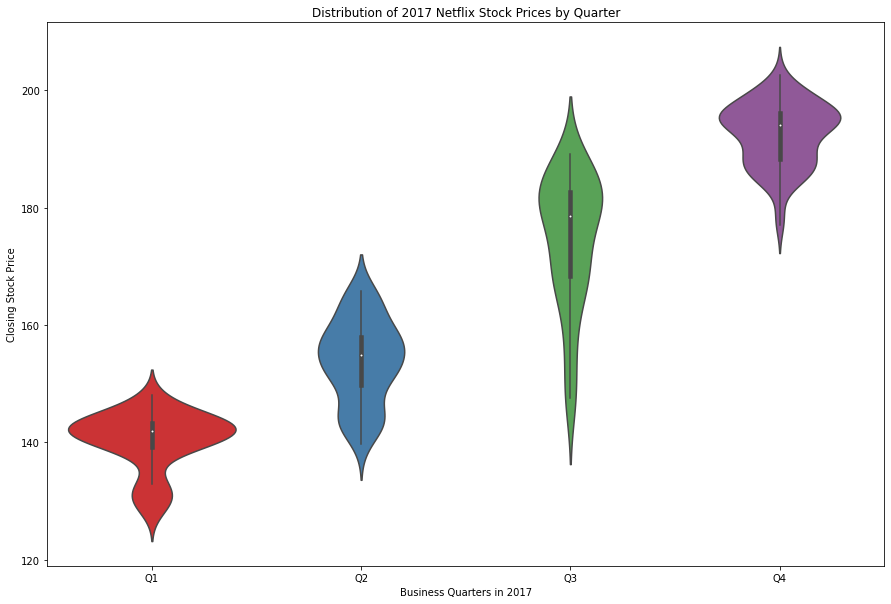

In [27]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.violinplot(data=netflix_stocks_quarterly, x=netflix_stocks_quarterly.Quarter, y=netflix_stocks_quarterly.Price, palette='Set1')
ax.set_title('Distribution of 2017 Netflix Stock Prices by Quarter')
ax.set_ylabel('Closing Stock Price')
ax.set_xlabel('Business Quarters in 2017')

## Graph Literacy
- What are your first impressions looking at the visualized data?

- In what range(s) did most of the prices fall throughout the year?

- What were the highest and lowest prices? 

**According the violin plot above, it can be observed that, the stock price of Netflix kept on increasing. The ranges or distribution of the prices kept wider till it got to the last quarter of the year. The highest of the stock with the year was around 200 dollars whiles the lowest prices was around 120 dollars. it can also be observed that, the prices were within the range of 140 dollars to 180 dollars in the year 2017.**

## Step 6

Next, we will chart the performance of the earnings per share (EPS) by graphing the estimate Yahoo projected for the Quarter compared to the actual earnings for that quarters. We will accomplish this using a scatter chart. 

1. Plot the actual EPS by using `x_positions` and `earnings_actual` with the `plt.scatter()` function. Assign `red` as the color.
2. Plot the actual EPS by using `x_positions` and `earnings_estimate` with the `plt.scatter()` function. Assign `blue` as the color

3. Often, estimates and actual EPS are the same. To account for this, be sure to set your transparency  `alpha=0.5` to allow for visibility pf overlapping datapoint.
4. Add a legend by using `plt.legend()` and passing in a list with two strings `["Actual", "Estimate"]`

5. Change the `x_ticks` label to reflect each quarter by using `plt.xticks(x_positions, chart_labels)`
6. Assing "`"Earnings Per Share in Cents"` as the title of your plot.


In [28]:
x_positions = [1, 2, 3, 4]
chart_labels = ["1Q2017","2Q2017","3Q2017","4Q2017"]
earnings_actual =[.4, .15,.29,.41]
earnings_estimate = [.37,.15,.32,.41 ]


Text(0.5, 1.0, 'Earnings Per Share in Cents')

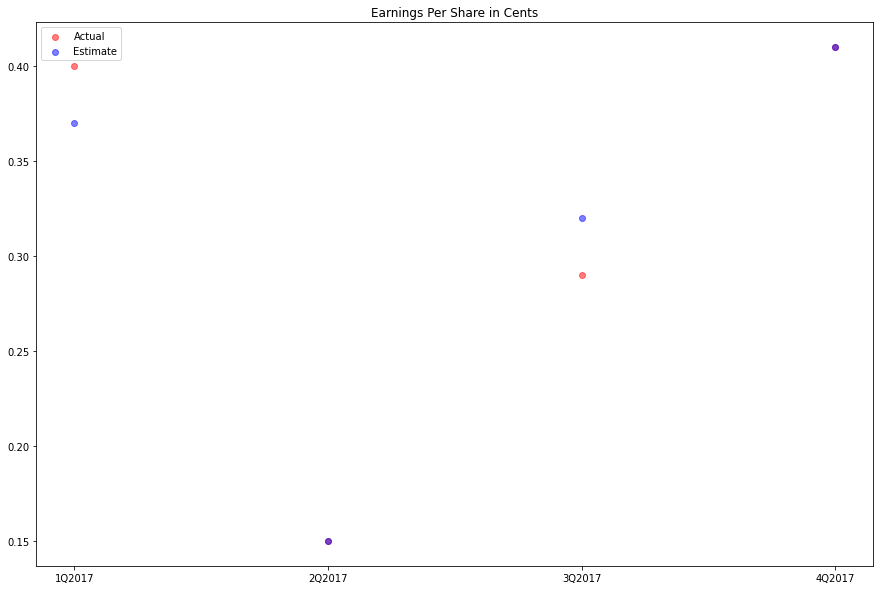

In [32]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.scatter(x_positions, earnings_actual, color='red', alpha=0.5)
plt.scatter(x_positions, earnings_estimate, color='blue', alpha=0.5)
plt.legend(['Actual', 'Estimate'])
plt.xticks(x_positions, chart_labels)
plt.title('Earnings Per Share in Cents')

## Graph Literacy

+ What do the purple dots tell us about the actual and estimate earnings per share in this graph? Hint: In color theory red and blue mix to make purple.


 The purple color show an equality in the actual earnings and the estimated earnings per share

## Step 7

Next, we will visualize the earnings and revenue reported by Netflix by mapping two bars side-by-side. We have visualized a similar chart in the second Matplotlib lesson [Exercise 4](https://www.codecademy.com/courses/learn-matplotlib/lessons/matplotlib-ii/exercises/side-by-side-bars).

As you may recall, plotting side-by-side bars in Matplotlib requires computing the width of each bar before hand. We have pasted the starter code for that exercise below. 

1. Fill in the `n`, `t`, `d`, `w` values for the revenue bars
2. Plot the revenue bars by calling `plt.bar()` with the newly computed `x_values` and the `revenue_by_quarter` data
3. Fill in the `n`, `t`, `d`, `w` values for the earnings bars
4. Plot the revenue bars by calling `plt.bar()` with the newly computed `x_values` and the `earnings_by_quarter` data
5. Create a legend for your bar chart with the `labels` provided
6. Add a descriptive title for your chart with `plt.title()`
7. Add labels to each quarter by assigning the position of the ticks through the code provided. Hint:  `plt.xticks(middle_x, quarter_labels)`
8. Be sure to show your plot!


([<matplotlib.axis.XTick at 0x7f51db45bf10>,
 [Text(0, 0, '2Q2017'),
  Text(0, 0, '3Q2017'),
  Text(0, 0, '4Q2017'),
  Text(0, 0, '1Q2018')])

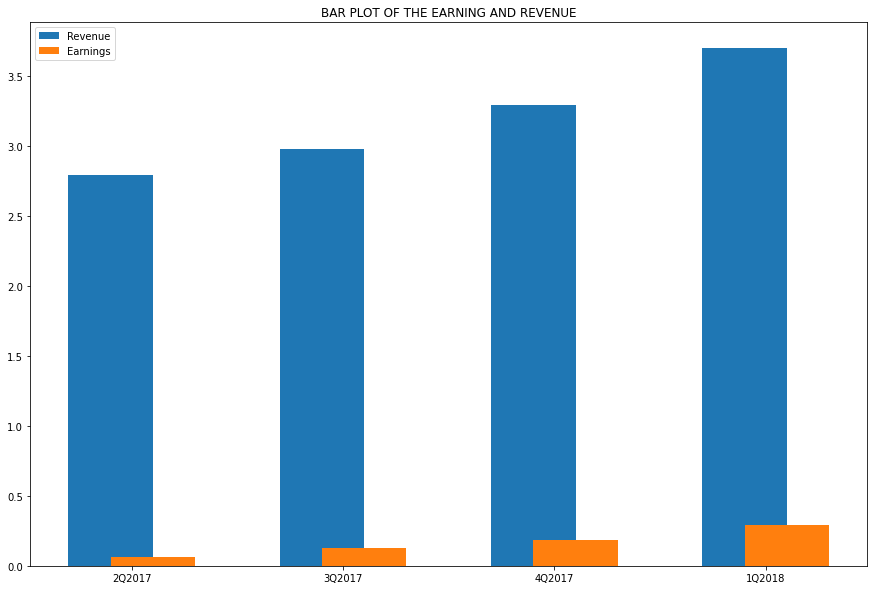

In [44]:
# The metrics below are in billions of dollars
revenue_by_quarter = [2.79, 2.98,3.29,3.7]
earnings_by_quarter = [.0656,.12959,.18552,.29012]
quarter_labels = ["2Q2017","3Q2017","4Q2017", "1Q2018"]

# Revenue
n = 1  # This is our first dataset (out of 2)
t = 2 # Number of dataset
d = 4 # Number of sets of bars
w = 0.4 # Width of each bar
bars1_x = [t*element + w*n for element
             in range(d)]




# Earnings
n = 2 # This is our second dataset (out of 2)
t = 2# Number of dataset
d = 4 # Number of sets of bars
w = 0.4 # Width of each bar
bars2_x = [t*element + w*n for element
             in range(d)]
fig, ax = plt.subplots(figsize=(15, 10))
plt.bar(bars1_x, revenue_by_quarter)
plt.bar(bars2_x, earnings_by_quarter)


middle_x = [ (a + b) / 2.0 for a, b in zip(bars1_x, bars2_x)]
labels = ["Revenue", "Earnings"]
plt.legend(labels)
plt.title('BAR PLOT OF THE EARNING AND REVENUE')
plt.xticks(middle_x, quarter_labels)


## Graph Literacy
What are your first impressions looking at the visualized data?

- Does Revenue follow a trend?
- Do Earnings follow a trend?
- Roughly, what percentage of the revenue constitutes earnings?

In [ ]:
'''
Both revenue and earnings follow a small increament trend.
3.6% of revenue is what constitutes the earnings.
'''

## Step 8

In this last step, we will compare Netflix stock to the Dow Jones Industrial Average in 2017. We will accomplish this by plotting two line charts side by side in one figure. 

Since `Price` which is the most relevant data is in the Y axis, let's map our subplots to align vertically side by side.
- We have set up the code for you on line 1 in the cell below. Complete the figure by passing the following arguments to `plt.subplots()` for the first plot, and tweaking the third argument for the second plot
    - `1`-- the number of rows for the subplots
    - `2` -- the number of columns for the subplots
    - `1` -- the subplot you are modifying

- Chart the Netflix Stock Prices in the left-hand subplot. Using your data frame, access the `Date` and `Price` charts as the x and y axes respectively. Hint: (`netflix_stocks['Date'], netflix_stocks['Price']`)
- Assign "Netflix" as a title to this subplot. Hint: `ax1.set_title()`
- For each subplot, `set_xlabel` to `"Date"` and `set_ylabel` to `"Stock Price"`
- Chart the Dow Jones Stock Prices in the left-hand subplot. Using your data frame, access the `Date` and `Price` charts as the x and y axes respectively. Hint: (`dowjones_stocks['Date'], dowjones_stocks['Price']`)
- Assign "Dow Jones" as a title to this subplot. Hint: `plt.set_title()`
- There is some crowding in the Y axis labels, add some space by calling `plt.subplots_adjust(wspace=.5)`
- Be sure to `.show()` your plots.


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text major ticklabel objects>)

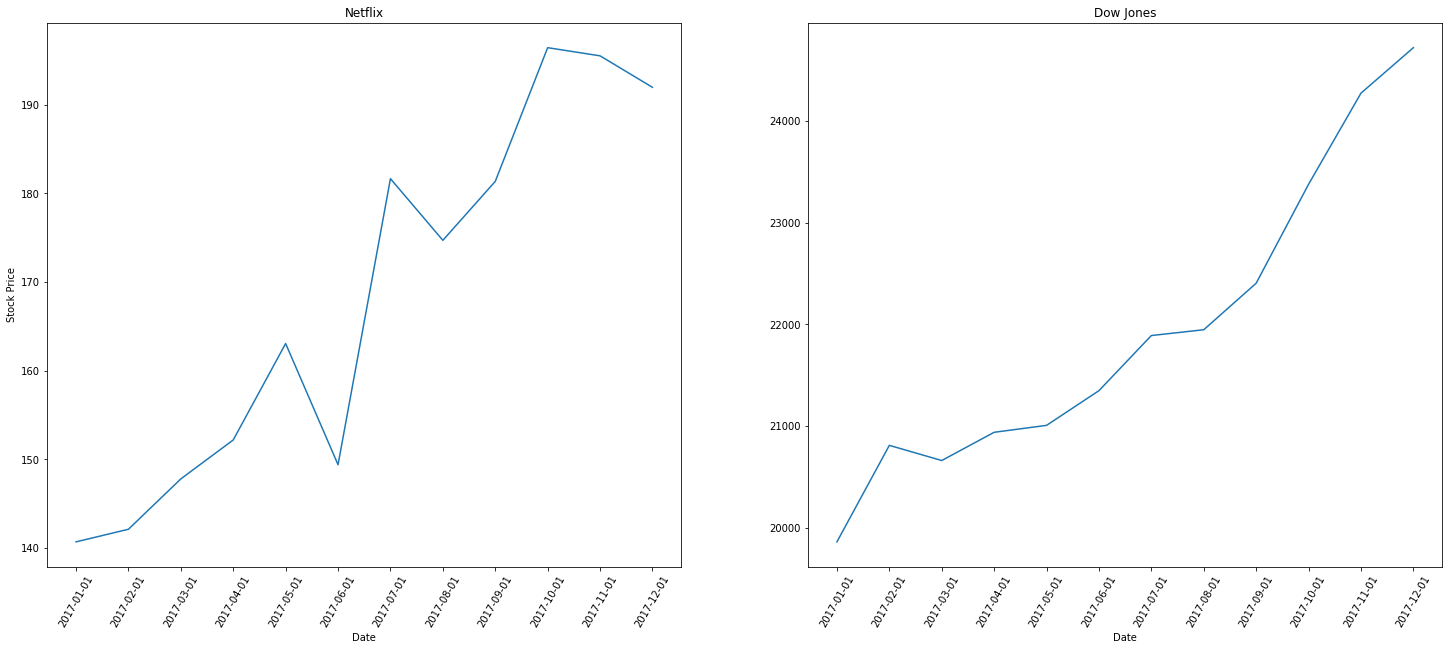

In [63]:
# Left plot Netflix
fig = plt.figure(figsize=(25, 10))
ax1 = plt.subplot(1, 2, 1)
plt.plot(netflix_stocks['Date'], netflix_stocks['Price'])
ax1.set_xlabel("Date")
ax1.set_title('Netflix')
ax1.set_ylabel('Stock Price')
plt.xticks(rotation=60)

# Right plot Dow Jones
ax2 = plt.subplot(1, 2, 2)
plt.plot(dowjones_stocks['Date'], dowjones_stocks['Price'])
ax2.set_title('Dow Jones')
ax2.set_xlabel('Date')
plt.xticks(rotation=60)

#plt.subplots_adjust(wspace=0.5)





- How did Netflix perform relative to Dow Jones Industrial Average in 2017?
- Which was more volatile?
- How do the prices of the stocks compare?

The netflix stock was more volatile than the Dow Jones. 
 Dow Jones has a higher price than that of the Netflix.
 

# Step 9

It's time to make your presentation! Save each of your visualizations as a png file with `plt.savefig("filename.png")`.

As you prepare your slides, think about the answers to the graph literacy questions. Embed your observations in the narrative of your slideshow!

Remember that your slideshow must include:
- A title slide
- A list of your visualizations and your role in their creation for the "Stock Profile" team
- A visualization of the distribution of the stock prices for Netflix in 2017
- A visualization and a summary of Netflix stock and revenue for the past four quarters and a summary
- A visualization and a brief summary of their earned versus actual earnings per share
- A visualization of Netflix stock against the Dow Jones stock (to get a sense of the market) in 2017
